In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import GridSearchCV


In [58]:
data= pd.read_csv('Customer Churn.csv')
pd.pandas.set_option('display.max_columns',None)

In [59]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Churn']=LE.fit_transform(data['Churn'])

<Axes: xlabel='Churn', ylabel='count'>

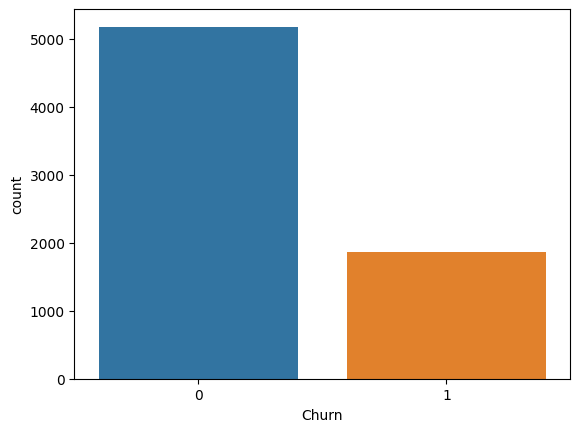

In [61]:
sns.countplot(x=data['Churn']) #imbalanced dataset

<Axes: ylabel='Churn'>

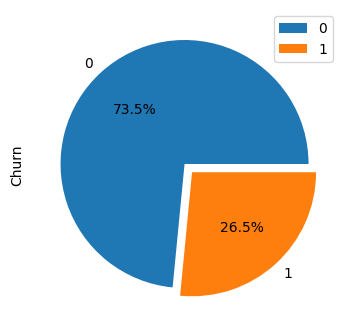

In [62]:
data['Churn'].value_counts().plot(kind='pie',explode=[0,0.09],autopct='%1.1f%%', legend=True,figsize= (4,8))

### EDA

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Converting Total Charges to numeric value

In [64]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce') # 7 missing values|

### Categorical Variables

In [65]:
data.drop(columns=['customerID'],inplace=True)

In [66]:
cat_var= [x for x in data.columns if data[x].dtypes =='O']

In [67]:
cat_var.append('SeniorCitizen')

In [68]:
cat_var

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

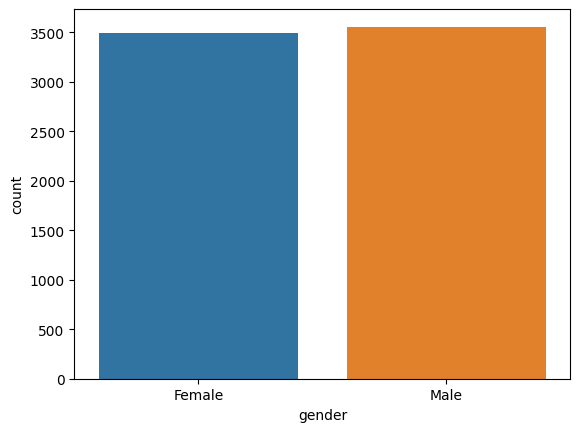

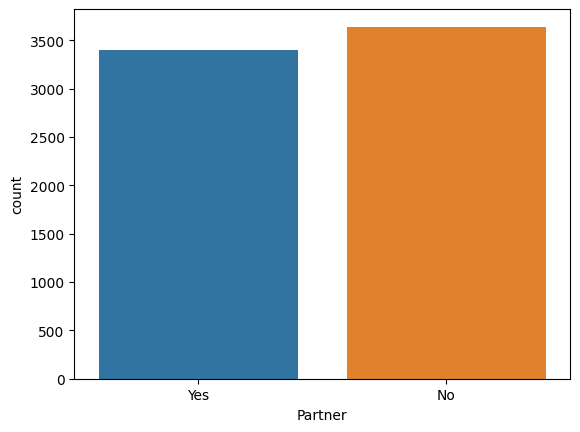

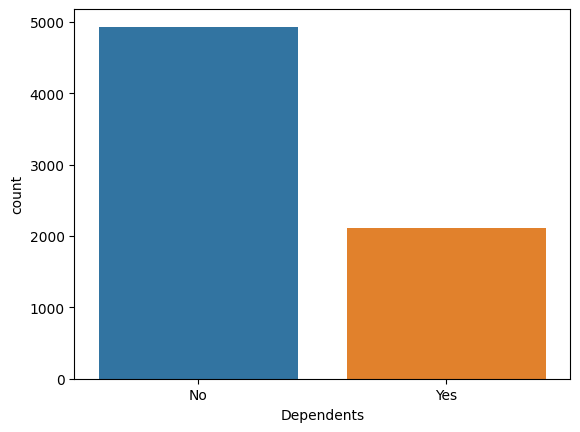

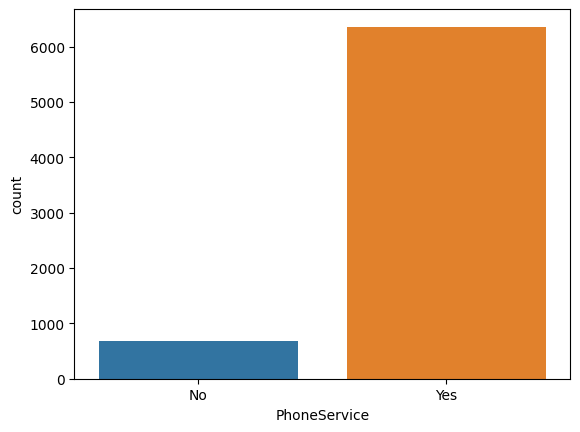

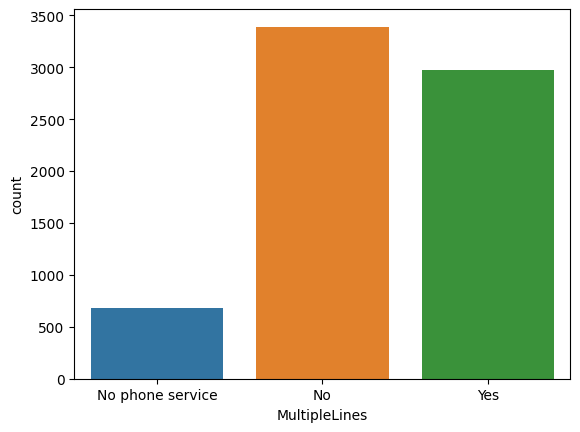

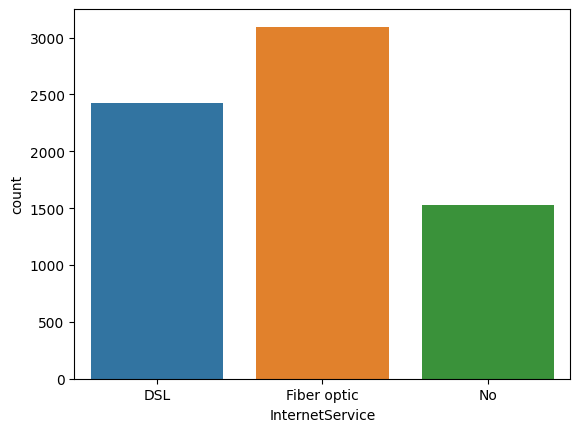

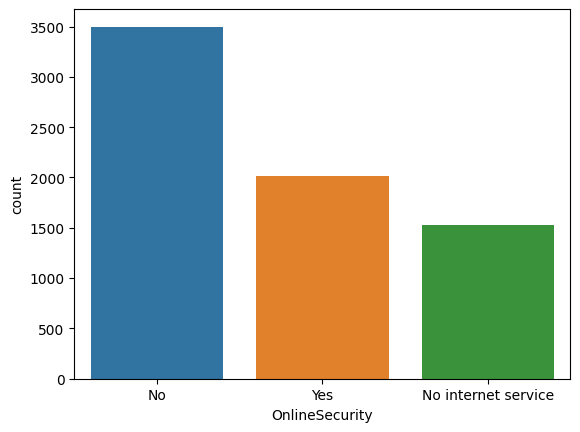

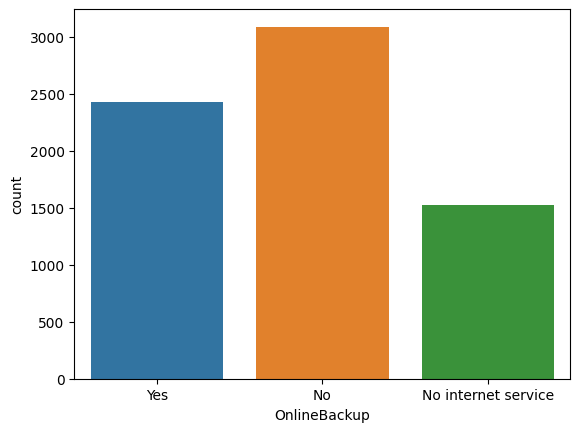

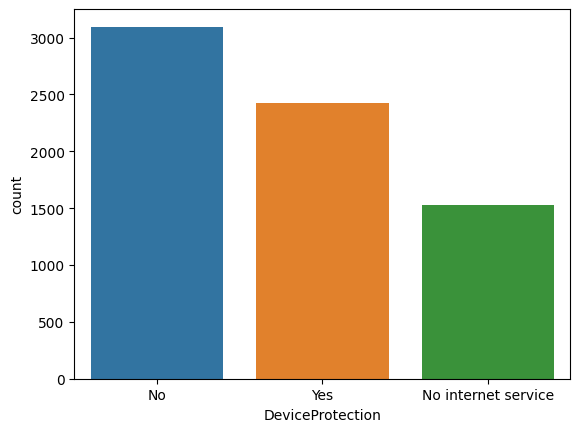

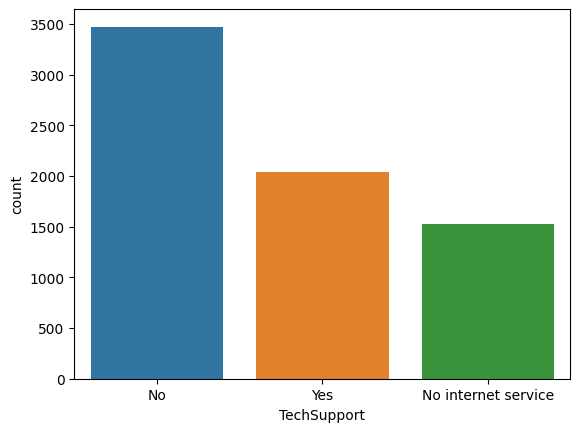

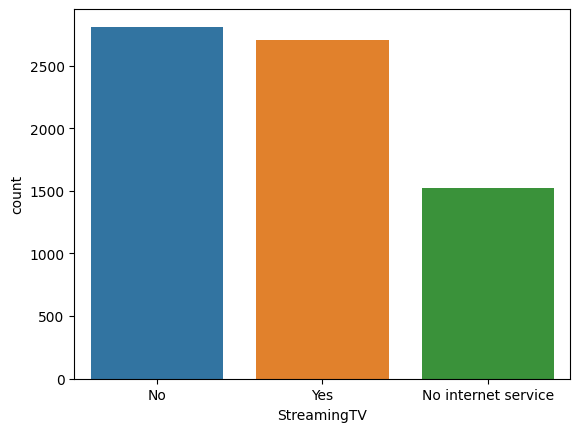

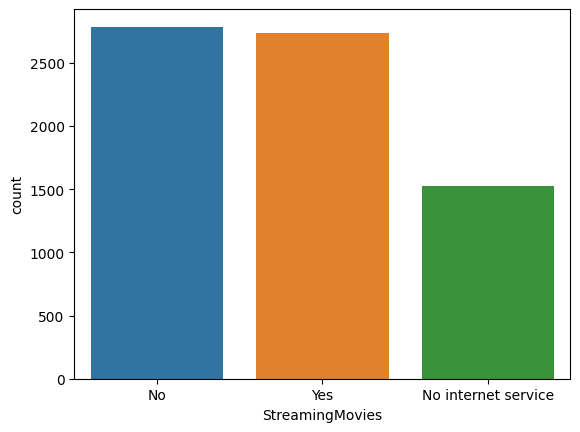

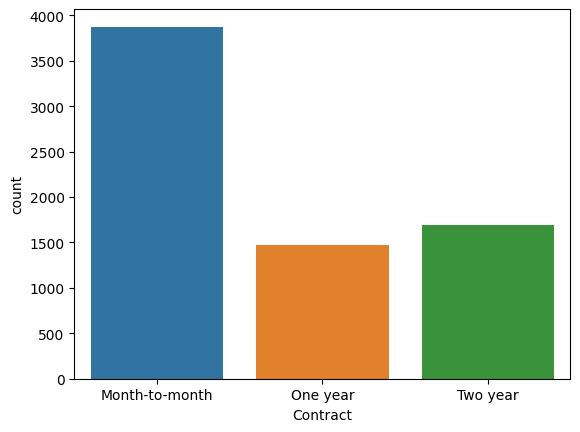

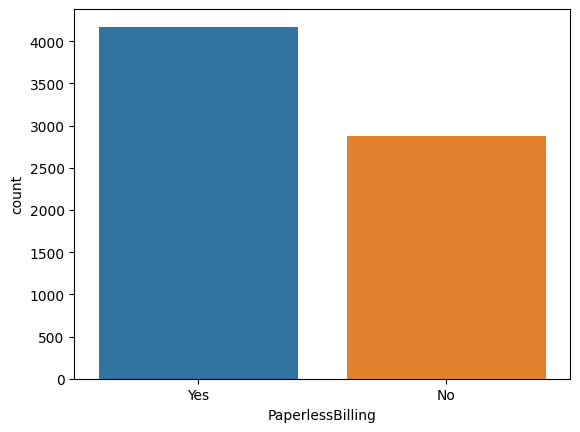

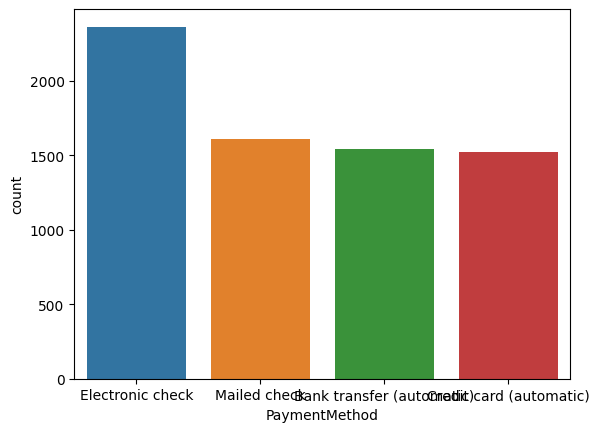

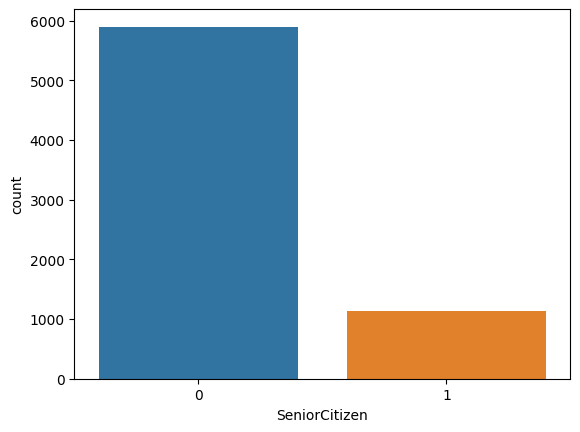

In [69]:
def plot_var(x):
    for i in x:
      sns.countplot(x=data[i])
      plt.show()
plot_var(cat_var)

<Axes: ylabel='PaymentMethod'>

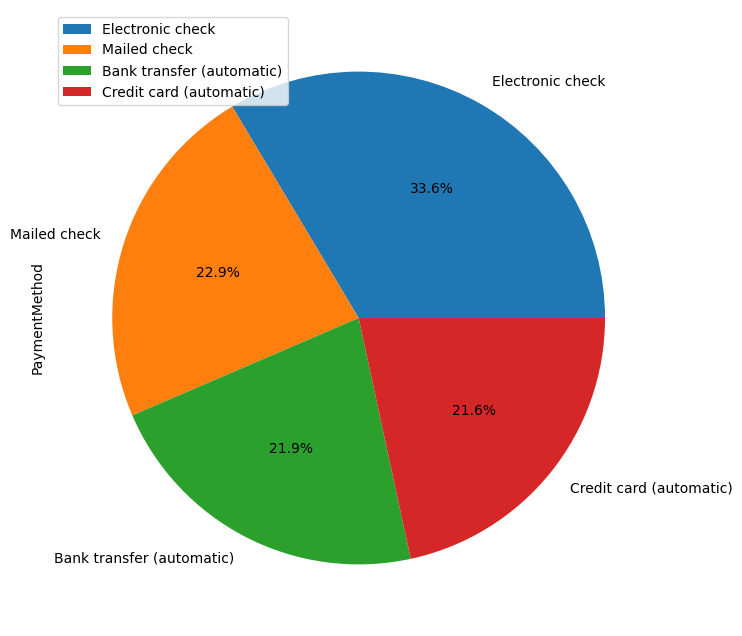

In [70]:
data['PaymentMethod'].value_counts().plot(kind='pie',autopct='%1.1f%%', legend=True,figsize= (8,8))

### Numeric Variables:

In [71]:
num_var= [x for x in data.columns if data[x].dtypes !='O']

In [72]:
num_var # y_train = 'Churn'  #percentage of customers that stopped using your product or service

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [73]:
num_var.pop(0)

'SeniorCitizen'

In [74]:
num_var.pop(3)

'Churn'

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

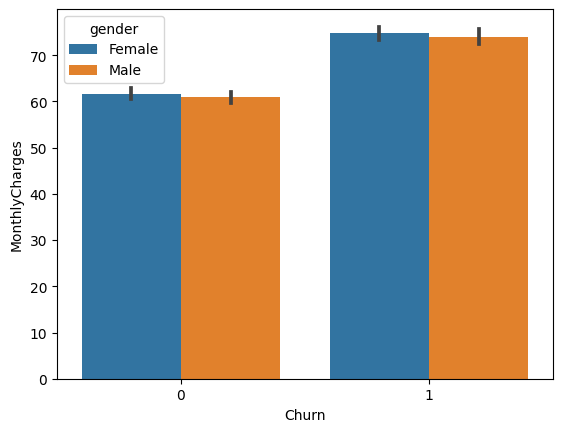

In [75]:
sns.barplot(x=data['Churn'],y=data['MonthlyCharges'],hue=data['gender'])

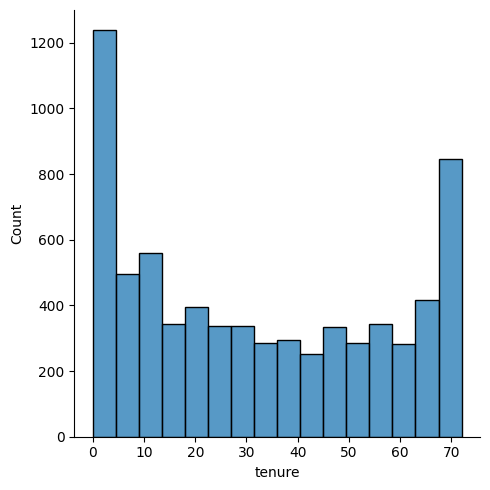

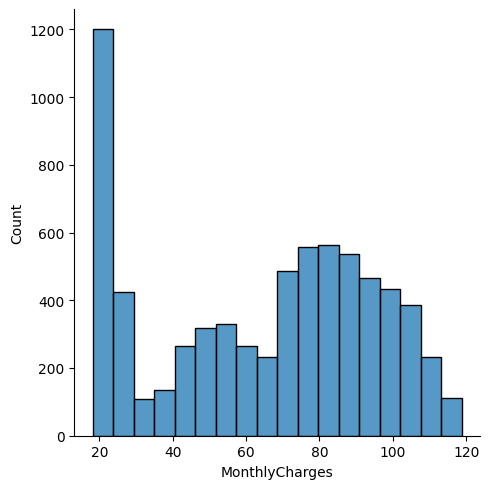

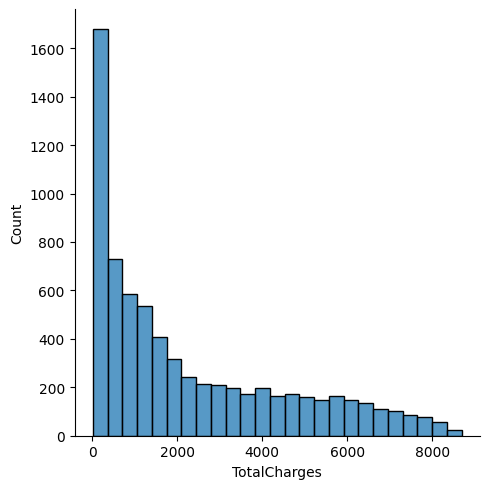

In [76]:
def plots(x):    #work needed on monthly charges , total charges (transformation)
  for i in x:    #work needed on tenure, seniorcitizen(int64) might use box cox transformation
    sns.displot(data[i])
    plt.show()
plots(num_var)

## Bivariate Analysis:

In [77]:
#factors highly related with churn:

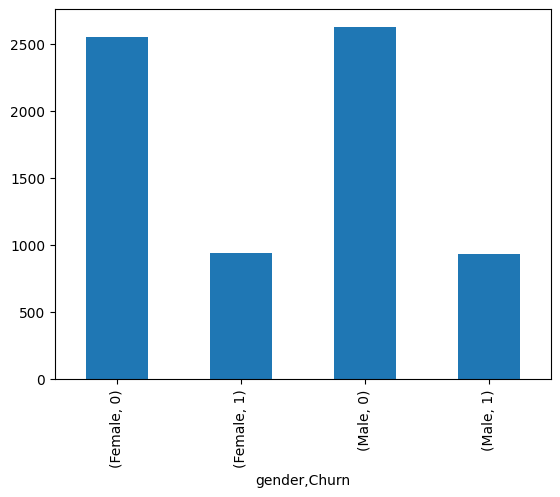

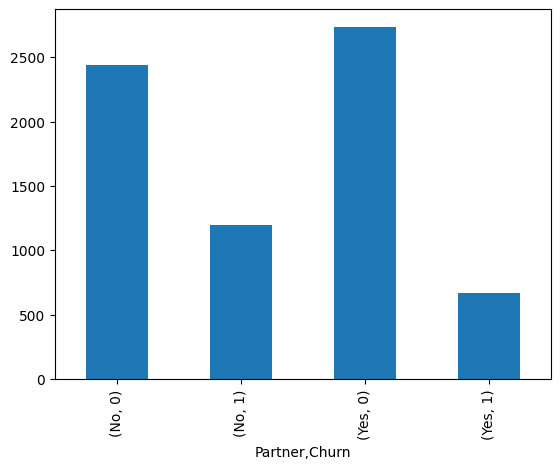

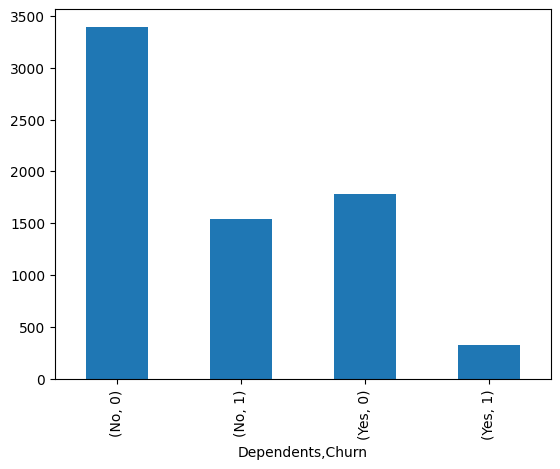

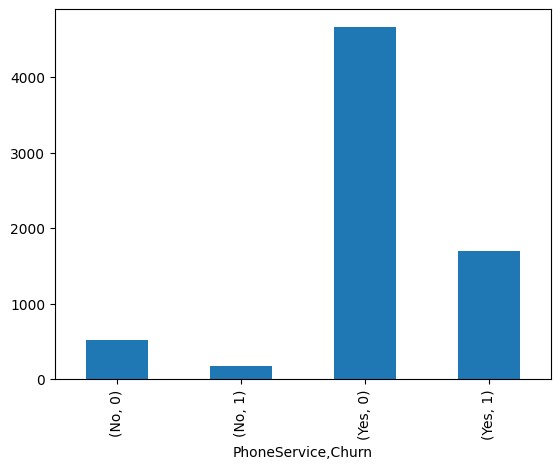

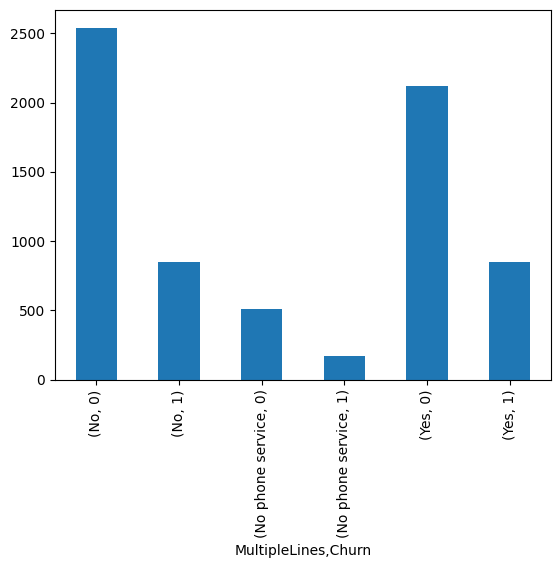

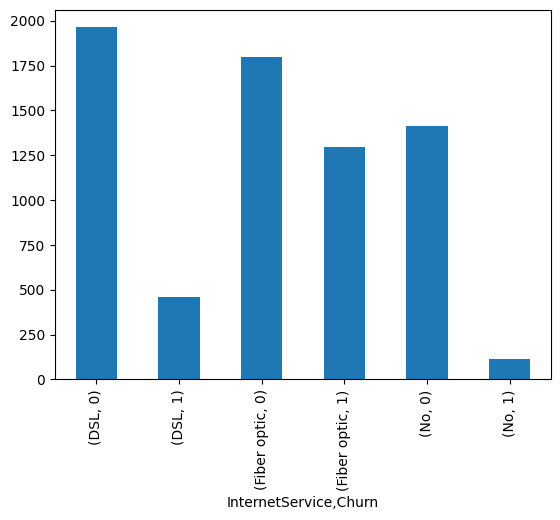

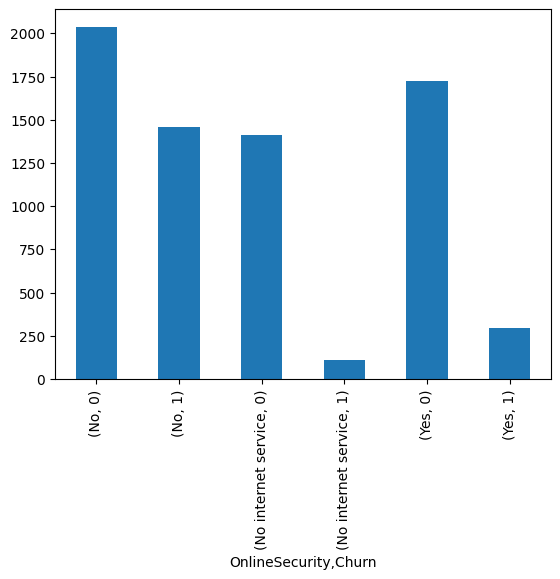

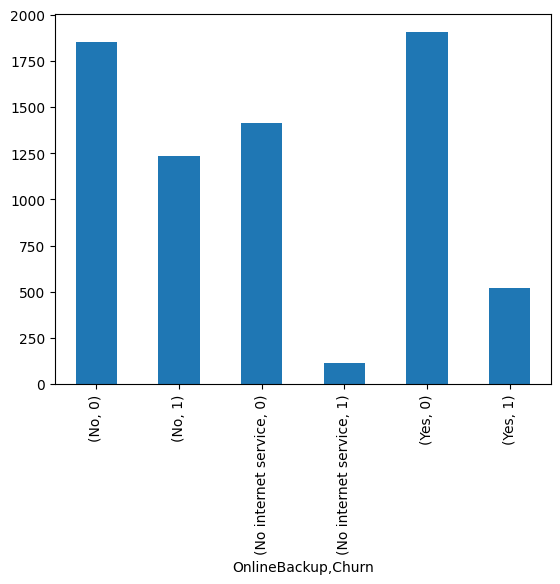

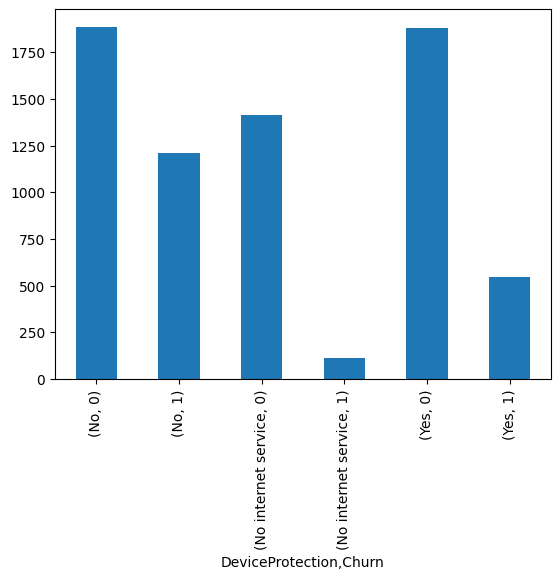

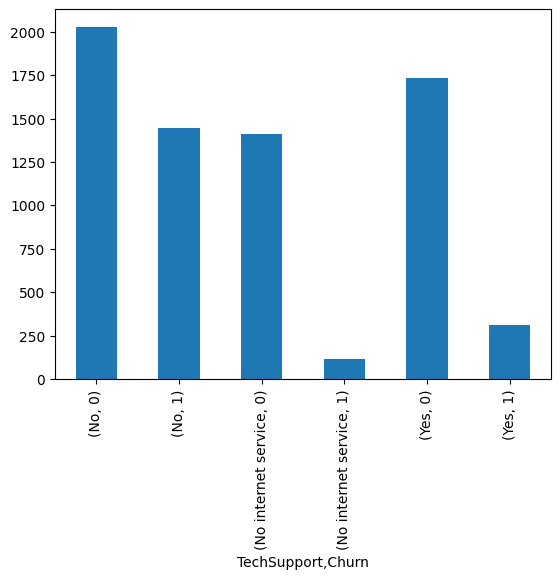

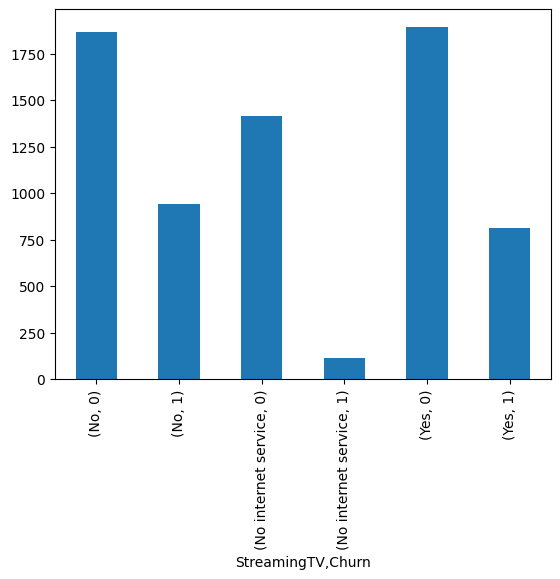

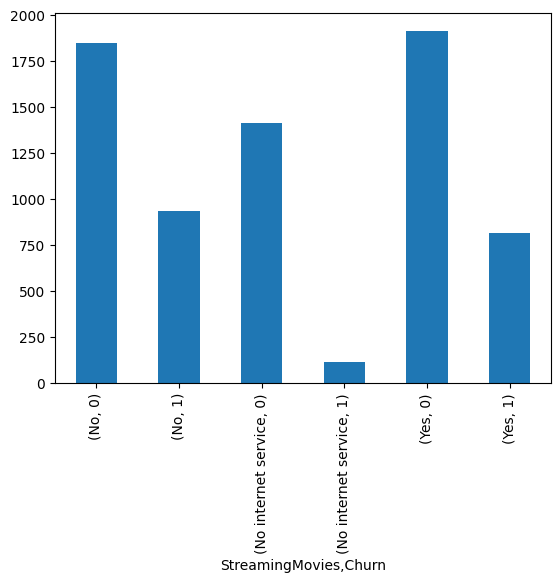

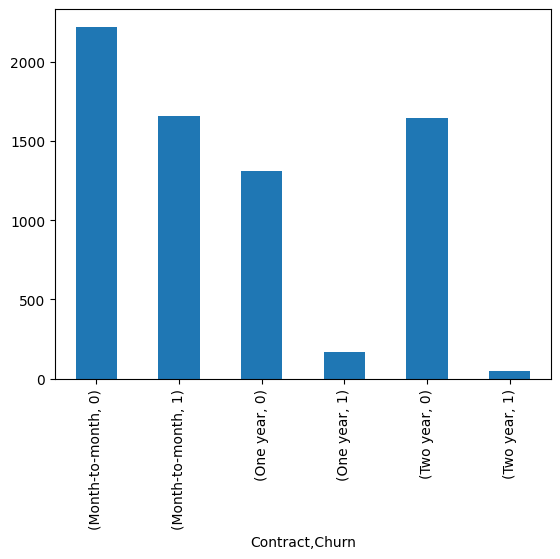

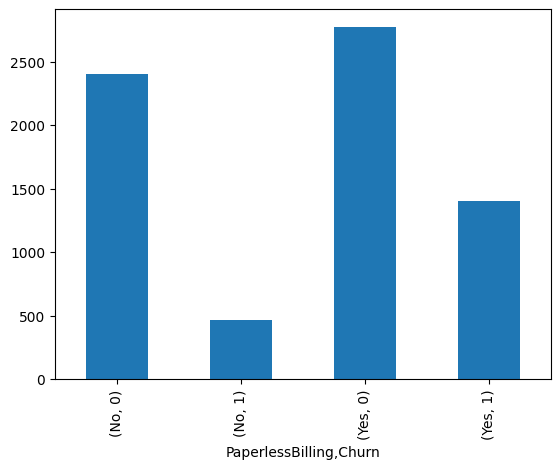

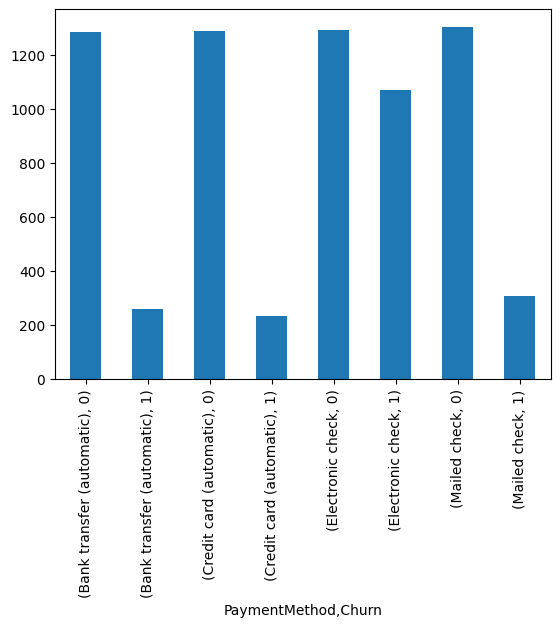

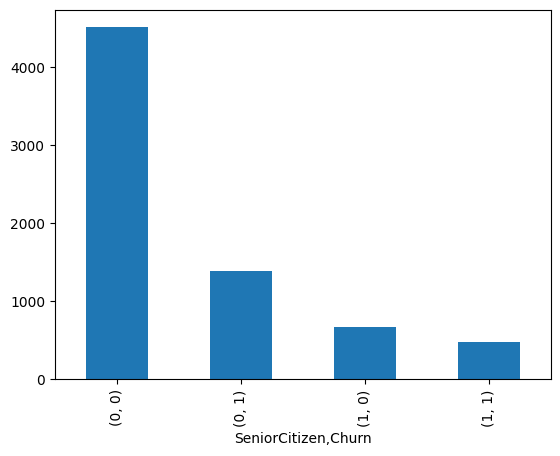

In [78]:
def bivariate(variable):
    for i in variable:
        data.groupby(data[i])['Churn'].value_counts().plot(kind='bar')

        plt.show()
bivariate(cat_var)

## HANDLING MISSING VALUES IN MONTHLY CHARGES:

In [79]:
data['TotalCharges']= data['TotalCharges'].fillna(data['TotalCharges'].median())

In [80]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
x= data.drop(columns=['Churn'])
y=data['Churn']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [82]:
kbin_mc= KBinsDiscretizer(n_bins=13,encode='ordinal',strategy='quantile')
kbin_tc= KBinsDiscretizer(n_bins=12,encode='ordinal',strategy='quantile')
kbin_tenure=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')

## Encoding

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer

X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [168]:
transformer= ColumnTransformer(transformers=[
                    ('trf1',OneHotEncoder(sparse=False,drop='first'),[0,2,3,5,6,7,8,9,10,11,12,13,14,15,16]),
                    ('trf2',kbin_mc,[17]),
                    ('trf3',kbin_tc,[18]),
                    ('trf4',kbin_tenure,[4])],
                    remainder='passthrough')
transformer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                  15, 16]),
                                ('trf2',
                                 KBinsDiscretizer(encode='ordinal', n_bins=13),
                                 [17]),
                                ('trf3',
                                 KBinsDiscretizer(encode='ordinal', n_bins=12),
                                 [18]),
                                ('trf4',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='uniform'),
                                 [4])])

In [169]:
X_train_transformed1= transformer.fit_transform(X_train)
X_test_transformed1= transformer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [170]:
X_train_transformed1.shape

(5634, 30)

In [171]:
X_train_transformed1

,trf1__gender_Male,trf1__Partner_Yes,trf1__Dependents_Yes,trf1__PhoneService_Yes,trf1__MultipleLines_No phone service,trf1__MultipleLines_Yes,trf1__InternetService_Fiber optic,trf1__InternetService_No,trf1__OnlineSecurity_No internet service,trf1__OnlineSecurity_Yes,trf1__OnlineBackup_No internet service,trf1__OnlineBackup_Yes,trf1__DeviceProtection_No internet service,trf1__DeviceProtection_Yes,trf1__TechSupport_No internet service,trf1__TechSupport_Yes,trf1__StreamingTV_No internet service,trf1__StreamingTV_Yes,trf1__StreamingMovies_No internet service,trf1__StreamingMovies_Yes,trf1__Contract_One year,trf1__Contract_Two year,trf1__PaperlessBilling_Yes,trf1__PaymentMethod_Credit card (automatic),trf1__PaymentMethod_Electronic check,trf1__PaymentMethod_Mailed check,trf2__MonthlyCharges,trf3__TotalCharges,trf4__tenure,remainder__SeniorCitizen
6426,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,5.0,0
2934,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
333,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,3.0,0.0,0
4469,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,9.0,9.0,6.0,0
692,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,10.0,9.0,1
4691,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,10.0,7.0,1
3061,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,7.0,3.0,1
6198,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,3.0,0


In [172]:
transformer.named_transformers_['trf2'].bin_edges_

array([array([ 18.4       ,  19.9       ,  20.65      ,  29.45      ,
               47.64615385,  55.65      ,  67.17692308,  74.25769231,
               79.8       ,  85.3       ,  90.95      ,  98.3       ,
              104.85      , 118.75      ])                           ],
      dtype=object)

# LOGISTIC REGRESSION

In [197]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=200)
LR.fit(X_train_transformed1,y_train)
y_pred= LR.predict(X_test_transformed1)

In [198]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [199]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)


Optimal threshold is: 1


In [200]:
# predict probabilities
pred_prob1 = LR.predict_proba(X_test_transformed1)
pred_prob2 = clf.predict_proba(X_test_transformed1)

In [201]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8434224101054326 0.7038373468206638


In [202]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

<Axes: >

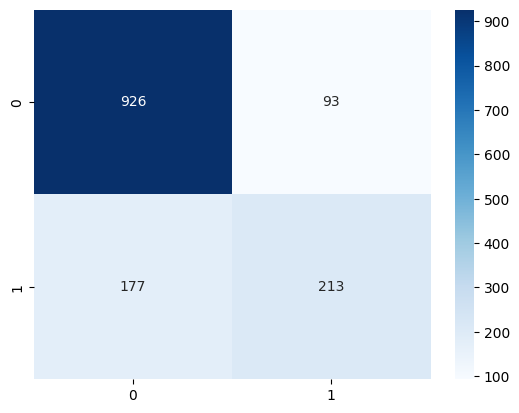

In [203]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,cmap="Blues",fmt='')


In [204]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.808374733853797

In [205]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LR,X_train_transformed1,y_train,scoring='accuracy'))

0.8051117334724454

# DECISION TREE:

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score   #Grid search cv
clf= DecisionTreeClassifier( min_samples_leaf=100,random_state=42,splitter='random',max_depth=5, min_impurity_decrease=0.02)
clf.fit(X_train_transformed1,y_train)
y_pred2= clf.predict(X_test_transformed1)
accuracy_score(y_test,y_pred2)

0.7579843860894251

In [183]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X_train_transformed1,y_train,scoring='accuracy'))

0.7626891052969184

# ADABOOST CLASSIFIER

In [184]:
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier(algorithm='SAMME', learning_rate=1.0, n_estimators=100)
ad.fit(X_train_transformed1,y_train)
y_pred4= ad.predict(X_test_transformed1)
accuracy_score(y_test,y_pred4)

0.8069552874378992

In [115]:
param_grid = {"n_estimators":[10,50,100,500,1000],
              "learning_rate": [0.0001,0.001,0.01,1.0],
              "algorithm":['SAMME', 'SAMME.R']
             }
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10,scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_transformed1, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}
0.8058189410831036


# Voting Classifier

### With Logistic Regression and Decision Tree:

In [ ]:
clf1= LogisticRegression()
clf2=DecisionTreeClassifier()

In [ ]:
estimators=[['lr',clf1],['dt',clf2]]

In [ ]:
for est in estimators:
    x= cross_val_score(est[1],X_train_transformed1,y_train,cv=10,scoring='accuracy')
    print(est[0],np.round(np.mean(x),2))

lr 0.8
dt 0.73


In [ ]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [ ]:
vc=VotingClassifier(estimators=estimators)
x= cross_val_score(vc,X_train_transformed2,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.78


# Soft Voting

In [ ]:
vc=VotingClassifier(estimators=estimators,voting='soft')   #Logistic Regression performs better than ensemble
x= cross_val_score(vc,X_train_transformed2,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.73


# Weighted Voting

In [ ]:
for i in range(1,3):
    for j in range(1,3):
            vc=VotingClassifier(estimators=estimators)   #Logistic Regression performs better than ensemble
            x= cross_val_score(vc,X_train_transformed2,y_train,cv=10,scoring='accuracy')
            print("i={},j={}".format(i,j),np.round(np.mean(x),2))

i=1,j=1 0.78
i=1,j=2 0.78
i=2,j=1 0.78
i=2,j=2 0.78
